In [32]:
import seaborn as sns

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the datasets
consumption_df = pd.read_csv('/Users/ishitajain/Downloads/Datathon Data/Energy Data - Consumption.csv')
emissions_df = pd.read_csv('/Users/ishitajain/Downloads/Datathon Data/Energy Data - Emissions.csv')

# Rename columns to ensure consistency
emissions_df.rename(columns={'MSN': 'EIA_ID'}, inplace=True)
consumption_df.drop(columns=['Energy Category'], inplace=True)

# Remove rows with missing, 'Not Available', or 'Not Meaningful' values in the 'Value' column
consumption_df = consumption_df[~consumption_df['Value'].isna() &
                                (consumption_df['Value'] != 'Not Available') &
                                (consumption_df['Value'] != 'Not Meaningful') &
                                (consumption_df['Value'] != 'No Data Reported')]
emissions_df = emissions_df[~emissions_df['Value'].isna() &
                            (emissions_df['Value'] != 'Not Available') &
                            (emissions_df['Value'] != 'Not Meaningful') &
                            (emissions_df['Value'] != 'No Data Reported')]

# Handle 'N/A', empty, and NaN values in the 'Sector' column to denote 'Overall'
consumption_df['Sector'] = consumption_df['Sector'].replace({'N/A': 'Overall', '': 'Overall', np.nan: 'Overall'})
emissions_df['Sector'] = emissions_df['Sector'].replace({'N/A': 'Overall', '': 'Overall', np.nan: 'Overall'})

# Since the emissions DataFrame was adjusted to match the consumption DataFrame columns
# Ensure the column order in emissions_df matches that of consumption_df before merging
emissions_df = emissions_df[consumption_df.columns]

# reset emissions value to emission
emissions_df.rename(columns={'Value': 'Emission (Mton Co2)'}, inplace=True)
emissions_df.drop(columns=['Unit'], inplace=True)
consumption_df.rename(columns={'Value': 'Consumption'}, inplace=True)
consumption_df['Consumption'] = consumption_df['Consumption'].astype(float)
emissions_df['Emission (Mton Co2)'] = emissions_df['Emission (Mton Co2)'].astype(float)



In [34]:
consumption_df['Energy Class'].value_counts()

Energy Class
Petroleum      21839
Renewable      16388
Natural Gas     7741
Coal            6625
Name: count, dtype: int64

In [35]:
consumption_df

,EIA_ID,YYYYMM,Date,Consumption,Column_Order,Description,Unit,Energy Type,Energy Class,Sector
0,DFRCPUS,197301,1/1/1973,1706.943,1,Distillate Fuel Oil Consumed by the Residentia...,Thousand Barrels per Day,Distillate Fuel Oil,Petroleum,Residential
1,DFRCPUS,197302,2/1/1973,1614.436,1,Distillate Fuel Oil Consumed by the Residentia...,Thousand Barrels per Day,Distillate Fuel Oil,Petroleum,Residential
2,DFRCPUS,197303,3/1/1973,1140.521,1,Distillate Fuel Oil Consumed by the Residentia...,Thousand Barrels per Day,Distillate Fuel Oil,Petroleum,Residential
3,DFRCPUS,197304,4/1/1973,824.604,1,Distillate Fuel Oil Consumed by the Residentia...,Thousand Barrels per Day,Distillate Fuel Oil,Petroleum,Residential
4,DFRCPUS,197305,5/1/1973,676.745,1,Distillate Fuel Oil Consumed by the Residentia...,Thousand Barrels per Day,Distillate Fuel Oil,Petroleum,Residential
...,...,...,...,...,...,...,...,...,...,...
57562,CLTCPUS,202307,7/1/2023,47529.382,12,"Coal Consumption, Total",Thousand Short Tons,Total,Coal,Overall
57563,CLTCPUS,202308,8/1/2023,47029.519,12,"Coal Consumption, Total",Thousand Short Tons,Total,Coal,Overall
57564,CLTCPUS,202309,9/1/2023,37359.909,12,"Coal Consumption, Total",Thousand Short Tons,Total,Coal,Overall
57565,CLTCPUS,202310,10/1/2023,33104.309,12,"Coal Consumption, Total",Thousand Short Tons,Total,Coal,Overall


In [36]:
consumption_df['Unit'].loc[consumption_df['Energy Class'] == 'Coal'].value_counts()

Unit
Thousand Short Tons    6625
Name: count, dtype: int64

In [37]:
dummy = consumption_df.loc[consumption_df['Unit']!= 'Thousand Short Tons']

In [38]:
#sns.scatterplot(y = dummy,hue=consumption_df['Unit'], x=consumption_df['Date'])

In [39]:
consumption_df['Consumption'].min()

-12.051

In [40]:
consumption_df

,EIA_ID,YYYYMM,Date,Consumption,Column_Order,Description,Unit,Energy Type,Energy Class,Sector
0,DFRCPUS,197301,1/1/1973,1706.943,1,Distillate Fuel Oil Consumed by the Residentia...,Thousand Barrels per Day,Distillate Fuel Oil,Petroleum,Residential
1,DFRCPUS,197302,2/1/1973,1614.436,1,Distillate Fuel Oil Consumed by the Residentia...,Thousand Barrels per Day,Distillate Fuel Oil,Petroleum,Residential
2,DFRCPUS,197303,3/1/1973,1140.521,1,Distillate Fuel Oil Consumed by the Residentia...,Thousand Barrels per Day,Distillate Fuel Oil,Petroleum,Residential
3,DFRCPUS,197304,4/1/1973,824.604,1,Distillate Fuel Oil Consumed by the Residentia...,Thousand Barrels per Day,Distillate Fuel Oil,Petroleum,Residential
4,DFRCPUS,197305,5/1/1973,676.745,1,Distillate Fuel Oil Consumed by the Residentia...,Thousand Barrels per Day,Distillate Fuel Oil,Petroleum,Residential
...,...,...,...,...,...,...,...,...,...,...
57562,CLTCPUS,202307,7/1/2023,47529.382,12,"Coal Consumption, Total",Thousand Short Tons,Total,Coal,Overall
57563,CLTCPUS,202308,8/1/2023,47029.519,12,"Coal Consumption, Total",Thousand Short Tons,Total,Coal,Overall
57564,CLTCPUS,202309,9/1/2023,37359.909,12,"Coal Consumption, Total",Thousand Short Tons,Total,Coal,Overall
57565,CLTCPUS,202310,10/1/2023,33104.309,12,"Coal Consumption, Total",Thousand Short Tons,Total,Coal,Overall


In [41]:
 
consumption_df['Consumption'] = consumption_df.apply(lambda row: row['Consumption'] * (0.14533783783/1000) if row['Unit'] == 'Thousand Barrels per Day' else row['Consumption'], axis=1)
consumption_df['Consumption'] = consumption_df.apply(lambda row: row['Consumption'] * 0.00103404518 if row['Unit'] == 'Billion Cubic Feet' else row['Consumption'], axis=1)
consumption_df['Consumption'] = consumption_df.apply(lambda row: row['Consumption'] * 0.00001921426 if row['Unit'] == 'Thousand Short Tons' else row['Consumption'], axis=1)
consumption_df['Consumption'] = consumption_df.apply(lambda row: row['Consumption'] * 0.001 if row['Unit'] == 'Trillion Btu' else row['Consumption'], axis=1)

consumption_df.rename(columns={'Consumption': 'Consumption (quadrillion Btu)'}, inplace=True)
consumption_df.drop(columns=['Unit'], inplace=True)

# Merge the datasets. inner join to ensure that only matching rows are retained
final_df = pd.merge(consumption_df, emissions_df, on=['Date', 'YYYYMM', 'Energy Type', 'Energy Class', 'Sector'], how='inner')
final_df.drop(columns=['EIA_ID_y'], inplace=True)
final_df.rename(columns={'EIA_ID_x': 'EIA_ID'}, inplace=True)
final_df.drop(columns=['YYYYMM', 'Description_x', 'Description_y'], inplace=True)
final_df['Emission per Consumption'] = final_df['Emission (Mton Co2)'] / final_df['Consumption (quadrillion Btu)']
final_df['Date'] = pd.to_datetime(final_df['Date'])
final_df.sort_values(by='Date', inplace=True)

# Save the merged dataset
#final_df.to_csv('Data/emission_consumption.csv', index=False)

# Display the first few rows of the merged dataset
#print(final_df.head())

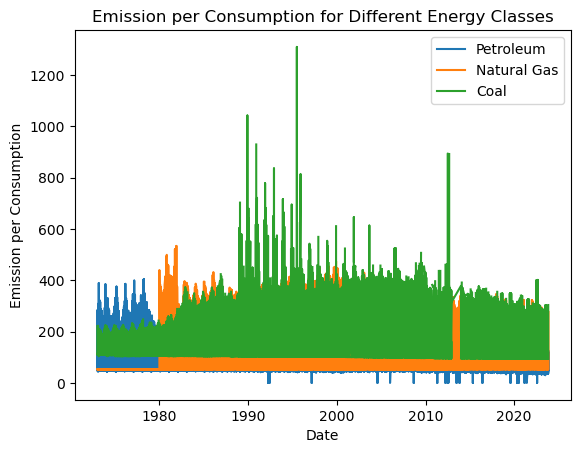

In [42]:
# plot emission per consumption for different energy classes

energy_classes = final_df['Energy Class'].unique()
for energy_class in energy_classes:
    energy_class_df = final_df[final_df['Energy Class'] == energy_class]
    plt.plot(energy_class_df['Date'], energy_class_df['Emission per Consumption'], label=energy_class)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Emission per Consumption')
plt.title('Emission per Consumption for Different Energy Classes')
plt.show()

<Axes: xlabel='Date', ylabel='Emission per Consumption'>

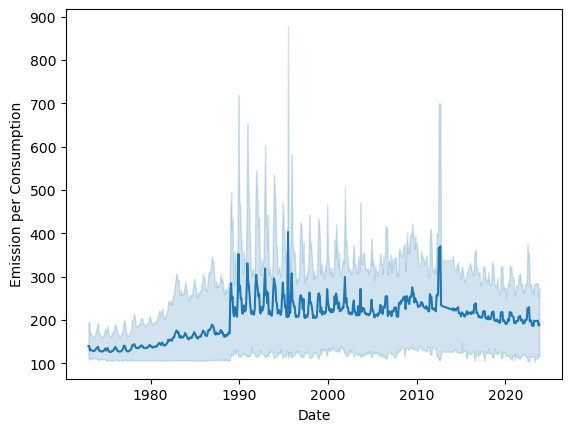

In [43]:
sns.lineplot(data=energy_class_df, x='Date', y='Emission per Consumption')

<Axes: xlabel='Date'>

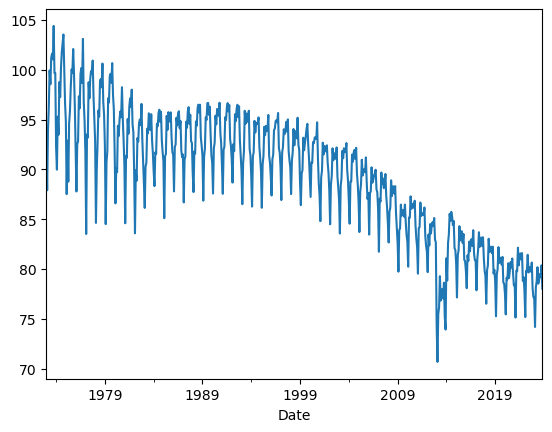

In [44]:
total_df = final_df[final_df['Energy Type'] != 'Total']
total_df = total_df.groupby('Date').sum()
total_df = total_df[['Consumption (quadrillion Btu)', 'Emission (Mton Co2)']]
total_df['Emission/Consumption'] = total_df['Emission (Mton Co2)'] / total_df['Consumption (quadrillion Btu)']
total_df.head()
total_df['Emission/Consumption'].plot()

In [45]:
total_df

,Consumption (quadrillion Btu),Emission (Mton Co2),Emission/Consumption
Date,,,
1973-01-01,4.610196,430.798,93.444618
1973-02-01,4.491307,394.799,87.902913
1973-03-01,4.138277,388.713,93.931124
1973-04-01,3.648769,350.983,96.192163
1973-05-01,3.593548,359.088,99.925754
...,...,...,...
2023-07-01,5.010301,395.370,78.911419
2023-08-01,5.122082,407.203,79.499511
2023-09-01,4.550699,360.342,79.183881


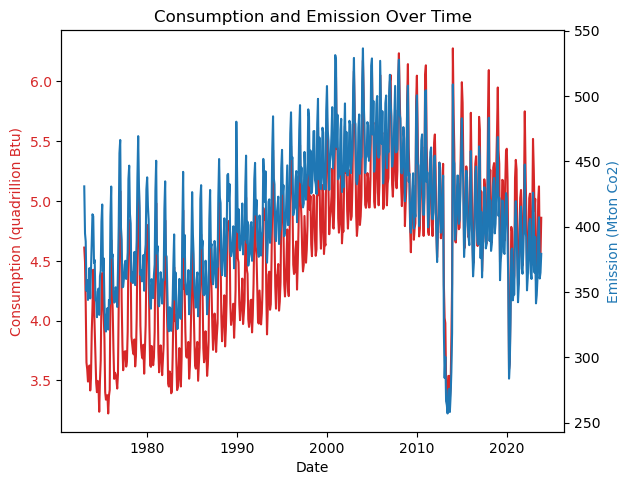

In [46]:
# plot emission and consumption on the same graph but different scales

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Consumption (quadrillion Btu)', color=color)
ax1.plot(total_df.index, total_df['Consumption (quadrillion Btu)'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Emission (Mton Co2)', color=color)
ax2.plot(total_df.index, total_df['Emission (Mton Co2)'], color=color)

fig.tight_layout()
plt.title('Consumption and Emission Over Time')
plt.show()

/var/folders/wk/48ywwld12k3b18wmjf4yr1080000gn/T/ipykernel_81976/1521974371.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  petroleum = petroleum[final_df['Energy Type'] == 'Total']


Text(0.5, 1.0, 'Consumption for Different Energy Classes')

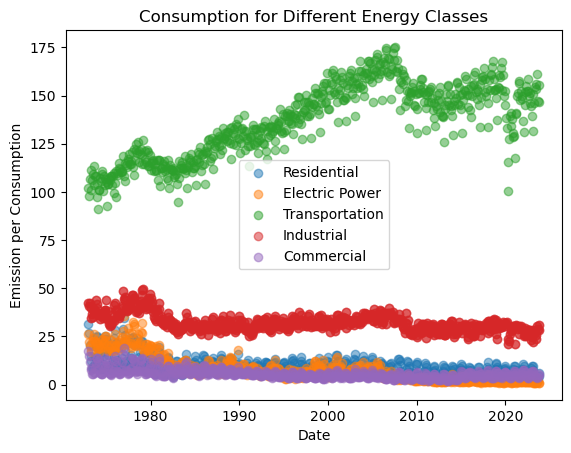

In [47]:
# graph emission and consumption for different energy classes

energy_classes = final_df['Energy Class'].unique()
petroleum = final_df[final_df['Energy Class'] == 'Petroleum']
petroleum = petroleum[final_df['Energy Type'] == 'Total']

# graph emission and consumption for different sectors

sectors = final_df['Sector'].unique()
for sector in sectors:
    sector_df = petroleum[petroleum['Sector'] == sector]
    plt.scatter(sector_df['Date'], sector_df['Emission (Mton Co2)'], label=sector, alpha = 0.5)

plt.legend()
plt.xlabel('Date')
plt.ylabel('Emission per Consumption')
plt.title('Consumption for Different Energy Classes')

In [48]:
# stationary test for consumption in petroleum sector
from statsmodels.tsa.stattools import adfuller

sectors = final_df['Sector'].unique()
for sector in sectors:
    sector_df = petroleum[petroleum['Sector'] == sector]
    result = adfuller(sector_df['Consumption (quadrillion Btu)'])
    print(f'Stationary test for {sector}:')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
        

Stationary test for Residential:
ADF Statistic: -2.253954
p-value: 0.187249
Critical Values:
	1%: -3.441
	5%: -2.866
	10%: -2.569
Stationary test for Electric Power:
ADF Statistic: -1.739843
p-value: 0.410710
Critical Values:
	1%: -3.441
	5%: -2.866
	10%: -2.569
Stationary test for Transportation:
ADF Statistic: -1.380802
p-value: 0.591444
Critical Values:
	1%: -3.441
	5%: -2.866
	10%: -2.569
Stationary test for Industrial:
ADF Statistic: -1.320447
p-value: 0.619767
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
Stationary test for Commercial:
ADF Statistic: -2.187836
p-value: 0.210690
Critical Values:
	1%: -3.441
	5%: -2.866
	10%: -2.569


<Axes: xlabel='Date'>

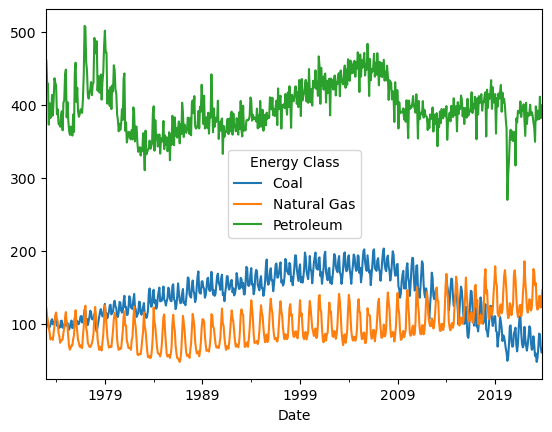

In [49]:
# total emission by energy class
total_emission = final_df.groupby(['Date', 'Energy Class']).sum()
total_emission = total_emission[['Emission (Mton Co2)']]
total_emission = total_emission.unstack()
total_emission.columns = total_emission.columns.droplevel()
total_emission.plot()

In [62]:
energy_class_df

,level_0,index,Consumption (quadrillion Btu),Energy Type,Energy Class,Sector,Emission (Mton Co2),Emission per Consumption
Date,,,,,,,,
1973-01-01,15,104109,0.842153,CoalCoalCoalCoalCoal,CoalCoalCoalCoalCoal,TransportationElectric PowerCommercialIndustri...,109.679,559.862501
1973-02-01,62,104114,0.755559,CoalCoalCoalCoalCoal,CoalCoalCoalCoalCoal,Electric PowerIndustrialResidentialTransportat...,98.847,560.564980
1973-03-01,112,104119,0.762152,CoalCoalCoalCoalCoal,CoalCoalCoalCoalCoal,CommercialResidentialElectric PowerTransportat...,98.711,648.323272
1973-04-01,160,104124,0.721812,CoalCoalCoalCoalCoal,CoalCoalCoalCoalCoal,CommercialTransportationElectric PowerResident...,94.223,659.009878
1973-05-01,197,104129,0.737074,CoalCoalCoalCoalCoal,CoalCoalCoalCoalCoal,IndustrialCommercialResidentialTransportationE...,95.744,652.171798
...,...,...,...,...,...,...,...,...
2023-07-01,28131,107106,0.880456,CoalCoalCoalCoalCoal,CoalCoalCoalCoalCoal,IndustrialElectric PowerCommercialTransportati...,86.979,791.339346
2023-08-01,28175,107113,0.870705,CoalCoalCoalCoalCoal,CoalCoalCoalCoalCoal,Electric PowerIndustrialTransportationCommerci...,86.090,792.665834
2023-09-01,28228,107120,0.684784,CoalCoalCoalCoalCoal,CoalCoalCoalCoalCoal,TransportationCommercialIndustrialCommercialEl...,68.653,793.079282


Natural Gas


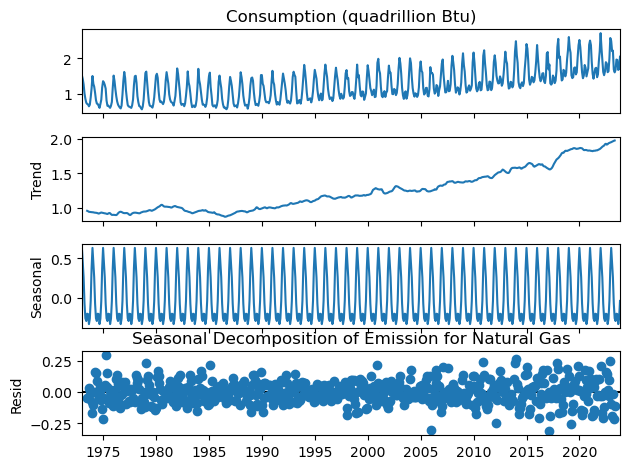

Petroleum


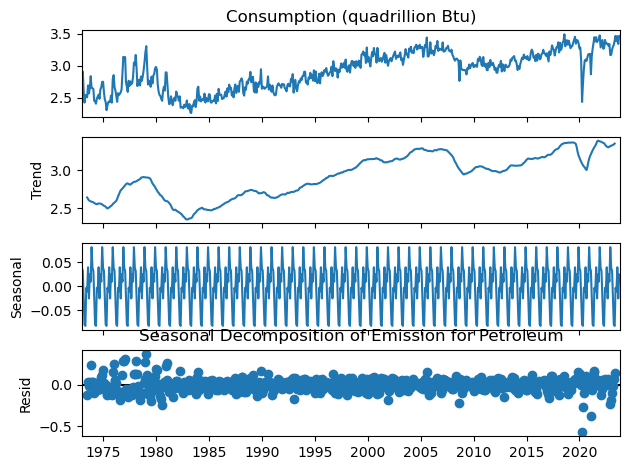

Coal


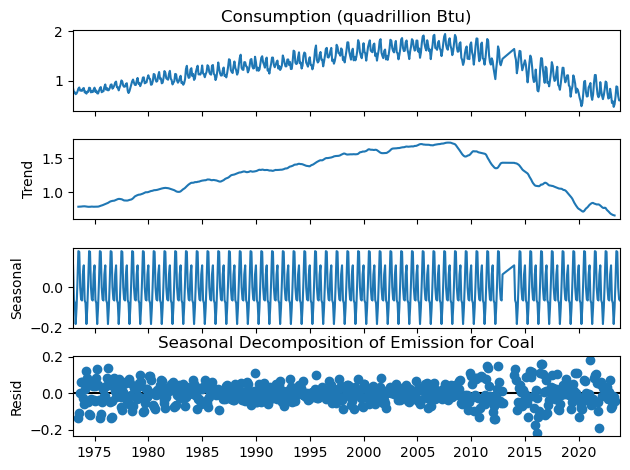

In [63]:
# seasonally decompose the emission data for different energy classes
from statsmodels.tsa.seasonal import seasonal_decompose
energy_classes = final_df['Energy Class'].unique()
for energy_class in energy_classes:
    energy_class_df = final_df[final_df['Energy Class'] == energy_class]
    energy_class_df = energy_class_df.groupby('Date').sum()
    result = seasonal_decompose(energy_class_df['Consumption (quadrillion Btu)'], model='additive', period=12)
    result.plot()
    print(energy_class)
    plt.title(f'Seasonal Decomposition of Emission for {energy_class}')
    plt.show()

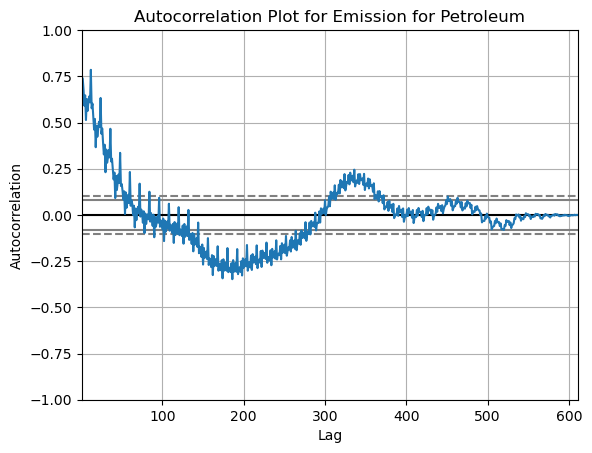

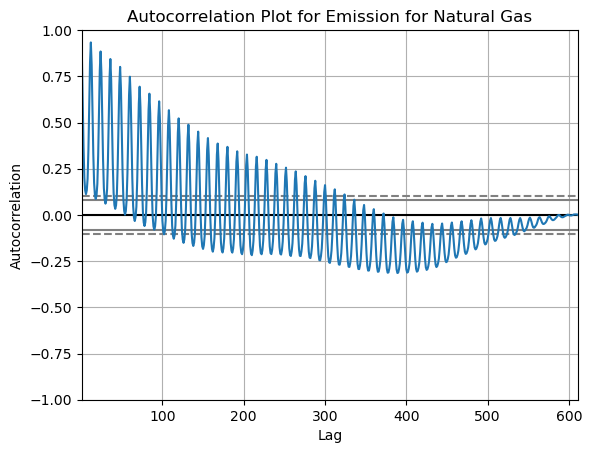

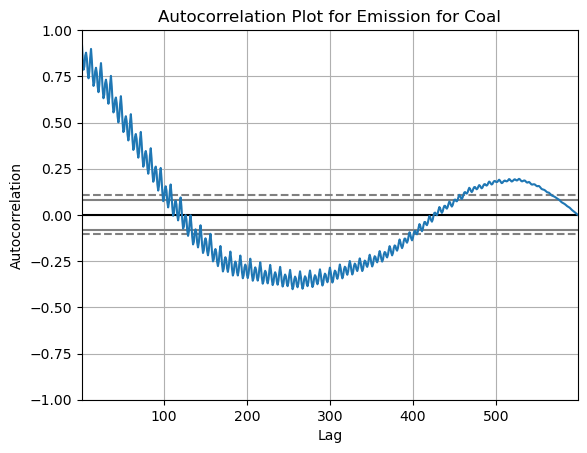

In [51]:
# autocorrelation plot for emission data
from pandas.plotting import autocorrelation_plot
energy_classes = final_df['Energy Class'].unique()
for energy_class in energy_classes:
    energy_class_df = final_df[final_df['Energy Class'] == energy_class]
    energy_class_df = energy_class_df.groupby('Date').sum()
    autocorrelation_plot(energy_class_df['Emission (Mton Co2)'])
    plt.title(f'Autocorrelation Plot for Emission for {energy_class}')
    plt.show()
    

In [52]:
final_df.drop(['EIA_ID','Column_Order_x','Column_Order_y'],axis=1,inplace=True)

In [53]:
final_df

,Date,Consumption (quadrillion Btu),Energy Type,Energy Class,Sector,Emission (Mton Co2),Emission per Consumption
0,1973-01-01,0.248083,Distillate Fuel Oil,Petroleum,Residential,22.796,91.888452
15083,1973-01-01,0.000977,Petroleum Coke,Petroleum,Electric Power,0.128,131.038037
18749,1973-01-01,0.231730,Natural Gas,Natural Gas,Electric Power,12.163,52.487917
14472,1973-01-01,0.026290,Distillate Fuel Oil,Petroleum,Electric Power,2.397,91.176304
13861,1973-01-01,1.236564,Total,Petroleum,Transportation,101.775,82.304707
...,...,...,...,...,...,...,...
8972,2023-11-01,0.020904,Motor Gasoline,Petroleum,Industrial,1.426,68.215853
9583,2023-11-01,0.059758,Petroleum Coke,Petroleum,Industrial,7.556,126.443984
10194,2023-11-01,0.002934,Residual Fuel Oil,Petroleum,Industrial,0.278,94.762683
11416,2023-11-01,0.433645,Distillate Fuel Oil,Petroleum,Transportation,37.627,86.769056


In [57]:
petrol = final_df.loc[final_df['Energy Class']=='Petroleum']
final_df = final_df.loc[final_df['Energy Class']!='Petroleum'] 
petrol = petrol.loc[petrol["Energy Type"] == "Total"]
final_df = pd.concat([final_df,petrol])
final_df.reset_index(inplace=True)
final_df = final_df.sort_values('Date')

In [58]:
final_df

,level_0,index,Date,Consumption (quadrillion Btu),Energy Type,Energy Class,Sector,Emission (Mton Co2),Emission per Consumption
0,0,18749,1973-01-01,0.231730,Natural Gas,Natural Gas,Electric Power,12.163,52.487917
5669,5669,5918,1973-01-01,0.149684,Total,Petroleum,Industrial,42.325,282.762039
5670,5670,4696,1973-01-01,0.193211,Total,Petroleum,Commercial,17.412,90.118908
5671,5671,1222,1973-01-01,0.390419,Total,Petroleum,Residential,31.236,80.006442
5672,5672,16305,1973-01-01,0.262598,Total,Petroleum,Electric Power,26.223,99.859750
...,...,...,...,...,...,...,...,...,...
5662,5662,21384,2023-11-01,0.023901,Coal,Coal,Industrial,7.254,303.496793
5663,5663,20593,2023-11-01,0.000696,Coal,Coal,Commercial,0.124,178.156477
5664,5664,20592,2023-11-01,0.000672,Coal,Coal,Commercial,0.124,184.613675
9331,9331,7138,2023-11-01,0.461447,Total,Petroleum,Industrial,30.972,67.119335


In [59]:
final_df.to_csv("/Users/ishitajain/Spring-Invitation-Datathon-2024/Clean Data/emi_com.csv")